# Price analysis, Profitability and Affordability of Taxi trips in New York City

## Name: Venkata Krishna Bharadwaj Boinepally
## UB ID: 50419396
## UB Email: vboinepa@buffalo.edu
## Course: CSE 587: Data Intensive Computing
## Term: Fall 2022
## Project Name: [Phase 2] Prediction of Taxi Trip Fare for given distance and time

## Data Processing
(Same as Phase 1. For more details, refer Phase 1)

Data Processing steps are being repeated here. These are the same steps as Phase 1. Since I am downloading the data again, I am including the Data Processing that is required. Scroll down to the "Machine Learning models to predict fare" section for the actual Phase 2 code.

Import numpy, pandas, matplotlib, seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

Source of dataset [https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

In [3]:
# trip data
!wget https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2022-06.parquet

--2022-11-14 20:33:03--  https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2022-06.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 18.65.40.156, 18.65.40.85, 18.65.40.229, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|18.65.40.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 458193119 (437M) [application/x-www-form-urlencoded]
Saving to: ‘fhvhv_tripdata_2022-06.parquet’

fhvhv_tripdata_2022 100%[===================>] 436.97M   234MB/s    in 1.9s    

2022-11-14 20:33:05 (234 MB/s) - ‘fhvhv_tripdata_2022-06.parquet’ saved [458193119/458193119]



In [4]:
# zone data
!wget https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv

--2022-11-14 20:33:06--  https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 52.222.137.46, 52.222.137.56, 52.222.137.206, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|52.222.137.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12322 (12K) [text/csv]
Saving to: ‘taxi+_zone_lookup.csv’

taxi+_zone_lookup.c 100%[===================>]  12.03K  --.-KB/s    in 0s      

2022-11-14 20:33:06 (74.5 MB/s) - ‘taxi+_zone_lookup.csv’ saved [12322/12322]



Do
1. pip install pyarrow
2. pip install fastparquet

For reading parquet files

Read trip data for June 2022

In [5]:
df = pd.read_parquet('fhvhv_tripdata_2022-06.parquet')

In [6]:
df

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2022-06-01 00:15:35,2022-06-01 00:17:20,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,...,0.68,2.75,0.0,1.00,9.36,N,N,,N,N
1,HV0003,B03404,B03404,2022-06-01 00:39:04,2022-06-01 00:40:36,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,...,1.81,2.75,0.0,4.82,15.61,N,N,,N,N
2,HV0003,B03404,B03404,2022-06-01 00:27:53,2022-06-01 00:31:34,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,...,1.09,2.75,0.0,1.00,8.22,N,N,,N,N
3,HV0003,B03404,B03404,2022-06-01 00:48:15,2022-06-01 00:49:38,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,...,2.19,2.75,0.0,0.00,16.88,N,N,,N,N
4,HV0005,B03406,None,2022-06-01 00:04:51,NaT,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,...,0.73,2.75,0.0,0.00,5.47,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17780070,HV0003,B03404,B03404,2022-06-30 23:20:49,2022-06-30 23:24:23,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,...,1.56,2.75,0.0,2.24,16.23,N,N,,N,N
17780071,HV0003,B03404,B03404,2022-06-30 23:36:13,2022-06-30 23:39:12,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,...,1.59,2.75,0.0,0.00,13.94,N,N,,N,N
17780072,HV0003,B03404,B03404,2022-06-30 23:50:50,2022-06-30 23:55:11,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,...,1.06,2.75,0.0,3.00,18.46,N,N,,N,N
17780073,HV0003,B03404,B03404,2022-06-30 23:02:40,2022-06-30 23:04:58,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,...,2.79,2.75,0.0,1.00,27.27,N,N,,N,N


Read zone data

In [7]:
zone_df = pd.read_csv('taxi+_zone_lookup.csv')

In [8]:
zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


Statistics for each column of trip data

In [9]:
df.describe()

,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07,1.778008e+07
mean,1.390083e+02,1.429608e+02,5.169061e+00,1.216133e+03,2.507782e+01,1.194475e+00,7.946835e-01,2.124014e+00,1.160395e+00,2.122203e-01,1.164189e+00,1.992252e+01
std,7.492537e+01,7.802175e+01,6.058429e+00,8.924502e+02,2.111751e+01,3.975068e+00,7.077042e-01,1.757838e+00,1.366686e+00,7.030242e-01,3.247914e+00,1.629283e+01
min,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.055700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+02
25%,7.500000e+01,7.600000e+01,1.660000e+00,6.180000e+02,1.191000e+01,0.000000e+00,3.600000e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.570000e+00
50%,1.400000e+02,1.420000e+02,3.119000e+00,9.840000e+02,1.922000e+01,0.000000e+00,5.800000e-01,1.640000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.536000e+01
75%,2.110000e+02,2.200000e+02,6.420000e+00,1.544000e+03,3.084000e+01,0.000000e+00,9.700000e-01,2.670000e+00,2.750000e+00,0.000000e+00,0.000000e+00,2.477000e+01
max,2.650000e+02,2.650000e+02,6.259600e+02,4.230900e+04,2.409230e+03,2.262000e+02,7.291000e+01,2.156800e+02,1.100000e+01,6.900000e+00,1.500000e+02,9.933100e+02


Column description for this data - [https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_hvfhs.pdf](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_hvfhs.pdf)

### Data Cleaning/Processing - 1
- Remove unnecessary columns not relevant to our problem statement

In [10]:
df.drop(columns=['dispatching_base_num',
                 'originating_base_num',
                 'on_scene_datetime',
                 'tolls',
                 'bcf',
                 'sales_tax',
                 'congestion_surcharge',
                 'airport_fee',
                 'shared_request_flag',
                 'shared_match_flag',
                 'access_a_ride_flag',
                 'wav_request_flag',
                 'wav_match_flag'],
        inplace=True)

In [11]:
df

,hvfhs_license_num,request_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tips,driver_pay
0,HV0003,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,480,7.68,1.00,9.36
1,HV0003,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,835,20.40,4.82,15.61
2,HV0003,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,549,12.29,1.00,8.22
3,HV0003,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,1197,24.70,0.00,16.88
4,HV0005,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,234,8.23,0.00,5.47
...,...,...,...,...,...,...,...,...,...,...,...
17780070,HV0003,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,816,17.60,2.24,16.23
17780071,HV0003,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,710,17.93,0.00,13.94
17780072,HV0003,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,595,11.98,3.00,18.46
17780073,HV0003,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,1184,31.47,1.00,27.27


### Data Cleaning/Processing - 2
- Drop NA values

In [12]:
df.dropna(inplace=True)

### Data Cleaning/Processing - 3
- Rename Columns and map the taxi company code to taxi name like Uber, Lyft

Actual codes
- HV0002: Juno
- HV0003: Uber
- HV0004: Via
- HV0005: Lyft

In [13]:
df.rename(columns={
    'hvfhs_license_num': 'taxi_company',
    'PULocationID': 'PULocation',
    'DOLocationID': 'DOLocation'
}, inplace=True)

In [14]:
def license_company_map(lic):
    if lic == 'HV0003':
        return 'Uber'
    elif lic == 'HV0005':
        return 'Lyft'
    return lic

In [15]:
df['taxi_company'] = pd.factorize(df['taxi_company'])[0]

In [16]:
df['taxi_company_name'] = df['taxi_company'].map(license_company_map)

### Data Cleaning/Processing - 4
- Now there are some unknown locations in Pickup and Dropoff which we know by analysing Zone dataframe
- Remove the rows containing unknown locations in "df"

In [17]:
zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [18]:
df

,taxi_company,request_datetime,pickup_datetime,dropoff_datetime,PULocation,DOLocation,trip_miles,trip_time,base_passenger_fare,tips,driver_pay,taxi_company_name
0,0,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,480,7.68,1.00,9.36,0
1,0,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,835,20.40,4.82,15.61,0
2,0,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,549,12.29,1.00,8.22,0
3,0,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,1197,24.70,0.00,16.88,0
4,1,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,234,8.23,0.00,5.47,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17780070,0,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,816,17.60,2.24,16.23,0
17780071,0,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,710,17.93,0.00,13.94,0
17780072,0,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,595,11.98,3.00,18.46,0
17780073,0,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,1184,31.47,1.00,27.27,0


In [19]:
def unknown_locations(id):
    if id == 264 or id == 265:
        return True
    return False

In [20]:
df[
    df.PULocation.map(unknown_locations)
].index

Int64Index([   13254,    64649,    70100,    75130,    86298,    99255,
              106944,   129350,   147399,   183654,
            ...
            17479230, 17500961, 17516820, 17545267, 17573284, 17618911,
            17700506, 17772055, 17773057, 17776276],
           dtype='int64', length=900)

In [21]:
df.drop(df[
    df.PULocation.map(unknown_locations)
].index, inplace=True)

In [22]:
df[
    df.DOLocation.map(unknown_locations)
].index

Int64Index([      23,       26,       44,       68,       80,      138,
                 150,      168,      192,      240,
            ...
            17779915, 17779930, 17779977, 17779986, 17779990, 17779999,
            17780016, 17780024, 17780036, 17780049],
           dtype='int64', length=767811)

In [23]:
df.drop(df[
    df.DOLocation.map(unknown_locations)
].index, inplace=True)

### Data Cleaning/Processing - 5
- There are some trips either having 0 miles as trip_miles or 0 seconds as time_time
- Remove those trips

In [24]:
def zero_trip(trip_ms):
    if trip_ms == 0:
        return True
    return False

In [25]:
df.drop(df[
    df.trip_miles.map(zero_trip)
].index, inplace=True)

In [26]:
df.drop(df[
    df.trip_time.map(zero_trip)
].index, inplace=True)

In [27]:
df

,taxi_company,request_datetime,pickup_datetime,dropoff_datetime,PULocation,DOLocation,trip_miles,trip_time,base_passenger_fare,tips,driver_pay,taxi_company_name
0,0,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,480,7.68,1.00,9.36,0
1,0,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,835,20.40,4.82,15.61,0
2,0,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,549,12.29,1.00,8.22,0
3,0,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,1197,24.70,0.00,16.88,0
4,1,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,234,8.23,0.00,5.47,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17780070,0,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,816,17.60,2.24,16.23,0
17780071,0,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,710,17.93,0.00,13.94,0
17780072,0,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,595,11.98,3.00,18.46,0
17780073,0,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,1184,31.47,1.00,27.27,0


In [28]:
zone_df

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


### Data Cleaning/Processing - 6
- Expand the pickup and dropoff column to contain location names instead of location code
- This is used in later phases to lookup addresses and estimate distance

In [29]:
zone_df['LocationName'] = zone_df['Zone'] + ", " + zone_df['Borough']

In [30]:
zone_df

,LocationID,Borough,Zone,service_zone,LocationName
0,1,EWR,Newark Airport,EWR,"Newark Airport, EWR"
1,2,Queens,Jamaica Bay,Boro Zone,"Jamaica Bay, Queens"
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,"Allerton/Pelham Gardens, Bronx"
3,4,Manhattan,Alphabet City,Yellow Zone,"Alphabet City, Manhattan"
4,5,Staten Island,Arden Heights,Boro Zone,"Arden Heights, Staten Island"
...,...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone,"World Trade Center, Manhattan"
261,262,Manhattan,Yorkville East,Yellow Zone,"Yorkville East, Manhattan"
262,263,Manhattan,Yorkville West,Yellow Zone,"Yorkville West, Manhattan"
263,264,Unknown,NV,NaN,"NV, Unknown"


In [31]:
zone_df.set_index('LocationID', inplace=True)

In [32]:
id_location_map = zone_df['LocationName'].T.to_dict()

In [33]:
df['PULocationName'] = df['PULocation'].map(id_location_map)

In [34]:
df['DOLocationName'] = df['DOLocation'].map(id_location_map)

In [35]:
df

,taxi_company,request_datetime,pickup_datetime,dropoff_datetime,PULocation,DOLocation,trip_miles,trip_time,base_passenger_fare,tips,driver_pay,taxi_company_name,PULocationName,DOLocationName
0,0,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,480,7.68,1.00,9.36,0,"Union Sq, Manhattan","Greenwich Village South, Manhattan"
1,0,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,835,20.40,4.82,15.61,0,"Midtown Center, Manhattan","Manhattan Valley, Manhattan"
2,0,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,549,12.29,1.00,8.22,0,"TriBeCa/Civic Center, Manhattan","Financial District North, Manhattan"
3,0,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,1197,24.70,0.00,16.88,0,"Financial District North, Manhattan","Stuyvesant Heights, Brooklyn"
4,1,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,234,8.23,0.00,5.47,1,"Kips Bay, Manhattan","Midtown East, Manhattan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17780070,0,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,816,17.60,2.24,16.23,0,"East Harlem North, Manhattan","Stuy Town/Peter Cooper Village, Manhattan"
17780071,0,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,710,17.93,0.00,13.94,0,"Stuy Town/Peter Cooper Village, Manhattan","Battery Park City, Manhattan"
17780072,0,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,595,11.98,3.00,18.46,0,"TriBeCa/Civic Center, Manhattan","TriBeCa/Civic Center, Manhattan"
17780073,0,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,1184,31.47,1.00,27.27,0,"Union Sq, Manhattan","Clinton East, Manhattan"


### Data Cleaning/Processing - 7
- Each trip has different number of miles, time taken and the final price
- To compare the prices among different trips, a new column called "fare_per_mile_per_second" is created which is obtained by dividing the "base_passenger_fare" by the "trip_miles" and "trip_time"

In [36]:
df['fare_per_mile_per_second'] = df['base_passenger_fare']/(df['trip_miles']*df['trip_time'])

### Data Cleaning/Processing - 8
- Create a new dataframe grouped by "taxi_company".
- This will be used to perform various analysis and compare results between different taxi companies. (Uber and Lyft)

In [37]:
taxi_grp_df = df.groupby(['taxi_company'])

"plot_bar" function to plot bar chart

In [38]:
def plot_bar(obj):
    obj.plot(kind='bar', title=obj.name, legend=True)

### Data Cleaning/Processing - 9
- Extract the hour from the given date time column for Request, Pickup and Dropoff
- This is used to analyse the trips during different times of day

In [39]:
df['request_hour'] = df['request_datetime'].dt.hour
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

In [40]:
def plot_hist(df, series, remove_extremes=True):
    max_value = df[series].quantile(0.99)
    if remove_extremes:
        df = df[df[series] < max_value]
        df = df[df[series] > 0]
    df[series].hist(bins=range(int(max_value)), legend=True)

### Data Cleaning/Processing - 10
- Create a new column "driver_percent_in_fare" to analyse the driver's pay as a percentage of the "base_passenger_fare"
- This is used later to understand how much of a profit margin Taxi companies are targetting to achieve. This profit margin directly effects the price passengers pay.

In [41]:
df['driver_percent_in_fare'] = df['driver_pay']/df['base_passenger_fare']*100

Seaborn plot utility functions for histogram and bar charts (Used for plotting grouped by data)

In [42]:
def plot_sns_grp_hist(grp_df, x, hue):
    ax = sns.histplot(grp_df, x=x, hue=hue, multiple='stack')
    ax.set(xlim=(0, grp_df[x].quantile(0.99)))

In [43]:
def plot_sns_grp_bar(grp_df, x, hue):
    ax = sns.barplot(grp_df, x=x, hue=hue, multiple='stack')
    ax.set(xlim=(0, grp_df[x].quantile(0.99)))

Utility functions to remove outliers, normalize column data using mean-std.dev or min-max procedures

In [44]:
def remove_outliers(df, column):
    min_value = df[column].quantile(0.01)
    max_value = df[column].quantile(0.99)
    df = df[df[column] < max_value]
    df = df[df[column] > min_value]

In [45]:
def mean_std_norm(df, column):
    meanv = df[column].mean()
    stdv = df[column].std()
    df[column] = (df[column] - meanv)/stdv
    df[column] += 1
    df[column] /= 2

In [46]:
def min_max_norm(df, column):
    minv = df[column].min()
    maxv = df[column].max()
    df[column] = 100*(df[column] - minv)/(maxv - minv)

In [47]:
# Used later
# remove_outliers(df, 'fare_per_mile_per_second')
# min_max_norm(df, 'fare_per_mile_per_second')

### Data Cleaning/Processing - 11
- In order to understand the true cost of each trip and the driver profits after deducting their gas cost, new columns like "driver_expenditure", "driver_profit" and "taxi_company_profit" are created.
- This is used in later phases to predict the base fare and how little or more the taxi company can charge the passenger and still end up in profit.
- Average mileage and gas price for the month are hyperparameters. We can choose the value according to the car type and gas prices

In [48]:
mpg = 20 # average miles per gallon
pg = 5.56 # NYC gas price in June 2022
df['driver_expenditure'] = (df['trip_miles']/mpg)*pg
df['driver_profit'] = df['driver_pay'] - df['driver_expenditure']
df['taxi_company_profit'] = df['base_passenger_fare'] - df['driver_pay']

## Phase 2 begins

## Machine Learning models to predict fare
(June 2022 Data, For Hire High Volume Vehicles only. Ex: Uber, Lyft)

In [49]:
df

,taxi_company,request_datetime,pickup_datetime,dropoff_datetime,PULocation,DOLocation,trip_miles,trip_time,base_passenger_fare,tips,...,PULocationName,DOLocationName,fare_per_mile_per_second,request_hour,pickup_hour,dropoff_hour,driver_percent_in_fare,driver_expenditure,driver_profit,taxi_company_profit
0,0,2022-06-01 00:15:35,2022-06-01 00:17:41,2022-06-01 00:25:41,234,114,1.500,480,7.68,1.00,...,"Union Sq, Manhattan","Greenwich Village South, Manhattan",0.010667,0,0,0,121.875000,0.417000,8.943000,-1.68
1,0,2022-06-01 00:39:04,2022-06-01 00:42:37,2022-06-01 00:56:32,161,151,4.180,835,20.40,4.82,...,"Midtown Center, Manhattan","Manhattan Valley, Manhattan",0.005845,0,0,0,76.519608,1.162040,14.447960,4.79
2,0,2022-06-01 00:27:53,2022-06-01 00:36:22,2022-06-01 00:45:31,231,87,2.910,549,12.29,1.00,...,"TriBeCa/Civic Center, Manhattan","Financial District North, Manhattan",0.007693,0,0,0,66.883645,0.808980,7.411020,4.07
3,0,2022-06-01 00:48:15,2022-06-01 00:51:18,2022-06-01 01:11:15,87,225,5.450,1197,24.70,0.00,...,"Financial District North, Manhattan","Stuyvesant Heights, Brooklyn",0.003786,0,0,1,68.340081,1.515100,15.364900,7.82
4,1,2022-06-01 00:04:51,2022-06-01 00:13:33,2022-06-01 00:17:27,137,162,1.069,234,8.23,0.00,...,"Kips Bay, Manhattan","Midtown East, Manhattan",0.032901,0,0,0,66.464156,0.297182,5.172818,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17780070,0,2022-06-30 23:20:49,2022-06-30 23:24:43,2022-06-30 23:38:19,74,224,6.070,816,17.60,2.24,...,"East Harlem North, Manhattan","Stuy Town/Peter Cooper Village, Manhattan",0.003553,23,23,23,92.215909,1.687460,14.542540,1.37
17780071,0,2022-06-30 23:36:13,2022-06-30 23:39:20,2022-06-30 23:51:10,224,13,4.900,710,17.93,0.00,...,"Stuy Town/Peter Cooper Village, Manhattan","Battery Park City, Manhattan",0.005154,23,23,23,77.746793,1.362200,12.577800,3.99
17780072,0,2022-06-30 23:50:50,2022-06-30 23:57:12,2022-07-01 00:07:07,231,231,0.530,595,11.98,3.00,...,"TriBeCa/Civic Center, Manhattan","TriBeCa/Civic Center, Manhattan",0.037990,23,23,0,154.090150,0.147340,18.312660,-6.48
17780073,0,2022-06-30 23:02:40,2022-06-30 23:06:44,2022-06-30 23:26:28,234,48,2.850,1184,31.47,1.00,...,"Union Sq, Manhattan","Clinton East, Manhattan",0.009326,23,23,23,86.653956,0.792300,26.477700,4.20


In [50]:
from sklearn.metrics import mean_squared_error, r2_score

def get_model_results(model_name, model):
    y_pred = model.predict(X_test)
    loss = mean_squared_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)
    print(f'Test results for {model_name}')
    print(f'Test Loss: {loss}')
    print(f'Test R Square: {score}')
    return loss, score

In [51]:
from sklearn.model_selection import train_test_split

# Only two features
# X_train, X_test, y_train, y_test = train_test_split(df[['trip_miles', 'trip_time']], df[['base_passenger_fare']], test_size=0.3)

The fare depends on the demand for the taxi at that particular day of the week and time. So deducing the day of the week from the date and passing it to the model can make it predict better

In [52]:
df['trip_day'] = df.request_datetime.dt.day_name()

In [53]:
df['trip_day'] = pd.factorize(df['trip_day'])[0]

Splitting the given data in the ratio 70:30 for training and testing

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['trip_miles', 'trip_time', 'request_hour', 'pickup_hour', 'dropoff_hour', 'PULocation', 'DOLocation', 'taxi_company', 'trip_day']],
    df[['base_passenger_fare']],
    test_size=0.3
)

### Model 1 - Linear Regression

- Linear Regression generally fits most of the data with good results (i.e., less loss).
- This will be a good starting point for doing price prediction.
- Based on the results we get for Linear Regression, we can improve the model for the next models.
- Normalizing the data before doing linear regression and enforcing positive coefficients (because fare is positive) gave better results than leaving everything as default
- We can now further improve this by using other advanced machine learning models like Decision Tree, Deep Learning

In [55]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True, positive=True, n_jobs=-1)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(n_jobs=-1, normalize=True, positive=True)

In [56]:
lr_loss, lr_score = get_model_results("Linear Regression", lr)

Test results for Linear Regression
Test Loss: 70.14919789318425
Test R Square: 0.7501338712601957


### Model 2 - K Nearest Neighbours

- K Nearest Neighbors takes the points closer to the given point and predicts fare based on the K closest points to the given input
- This should make the predicted price to be similar to other trips with similar trip time and trip fare
- KNN is also not effected by data which is not close to the given input which should give this model a better chance to be not effected by far away points which can result in drastic changes because of single outlier point
- Using k=10 and weighting points closer to the input gives good results
- This is an improvement over Linear Regression

In [57]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10, weights='distance', n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=10, weights='distance')

In [58]:
knn_loss, knn_score = get_model_results("k Nearest Neighbours", knn)

Test results for k Nearest Neighbours
Test Loss: 69.36531923260473
Test R Square: 0.7529259876664158


### Model 3 - Decision Tree Regression

- Decision Trees are used when we can group the data that are close to each other through similar feature set.
- Using Decision Tree will make sure the predicted price is consistent with the similar data points already present in training set
- For the purpose of this taxi fare data, I am choosing 500 max leaf nodes so that there will be 500 leafs for all price points.
- This configuration gives the best possible loss for the Decision Tree Regression
- In the 3 models we have seen so far, this Decision Tree model gave best results
- This gave better results than KNN

In [59]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_leaf_nodes=500)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=500)

In [60]:
dtree_loss, dtree_score = get_model_results("Decision Tree Regressor", dtree)

Test results for Decision Tree Regressor
Test Loss: 65.46318815033239
Test R Square: 0.76682508297535


### Model 4 - LightGBM Regression

- LightGBM is a lighter Gradient boosting framework based on Decision Trees and is known for being fast and efficient.
- Instead of growing horizontally, this algorithm grows vertically and chooses leaf with minimum error which drastically improves prediction but this is prone to overfitting for smaller data sets. Since we are using 17M records, chances are very less for this to happen.
- We are choosing "gbdt" boosting type for the algorithm as it is based on ensemble model
- Since we have lots of data, we can choose a smaller learning rate so that the tree learns accurately.
- This is the best result we achieved so far.

In [61]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(learning_rate=0.1, n_jobs=-1)
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [62]:
lgbm_loss, lgbm_score = get_model_results("LightGBM Regressor", lgbm)

Test results for LightGBM Regressor
Test Loss: 56.33599262957038
Test R Square: 0.7993354619891871


Note: SVM Regression is taking too long to train on 17M records so that is not included in this phase

### Model 5 - Deep Learning Model

For training the Deep Learning Model, we are using all 17 Million records.

After trying various Neural Network Architectures, different hyperparameters, I have finalized the following Neural Network with best results. The other Neural Networks I have tried are not shown here.

In [63]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 15.4 MB/s 


In [64]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow_addons.metrics import RSquare

- Since we have lots of data, we need to have sufficiently large number of parameters to train before we can start to overfit.
- Hence choosing more deeper and more number of neurons per layer. 
- I have tried 7 other architectures of Neural Networks and this configuration performed best. Other Neural Networks are not shown in this notebook.

In [65]:
dl = Sequential(
    [
        Input(shape=X_train.shape[1:]),
        BatchNormalization(),
        Dense(64, activation='relu', name='layer1'),
        Dense(128, activation='relu', name='layer2'),
        Dense(128, activation='relu', name='layer3'),
        Dense(512, activation='relu', name='layer4'),
        Dense(1024, activation='relu', name='layer5'),
        Dense(1024, activation='relu', name='layer6'),
        Dense(256, activation='relu', name='layer7'),
        Dense(128, activation='relu', name='layer8'),
        Dense(64, activation='relu', name='layer9'),
        Dense(16, activation='relu', name='layer10'),
        Dense(1, activation='relu', name='output')
    ]
)

dl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 9)                36        
 ormalization)                                                   
                                                                 
 layer1 (Dense)              (None, 64)                640       
                                                                 
 layer2 (Dense)              (None, 128)               8320      
                                                                 
 layer3 (Dense)              (None, 128)               16512     
                                                                 
 layer4 (Dense)              (None, 512)               66048     
                                                                 
 layer5 (Dense)              (None, 1024)              525312    
                                                        

- We have 1.9M parameters to train. Since we have 17M data points. We should be able to train them.
- 20% of the training data is used for validation

In [66]:
dl.compile(optimizer='adam', loss='mse', metrics=[RSquare()])
history = dl.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=2048)

Epoch 1/100
4651/4651 [==============================] - 49s 10ms/step - loss: 68.9871 - r_square: 0.7549 - val_loss: 63.2422 - val_r_square: 0.7750
Epoch 2/100
4651/4651 [==============================] - 44s 9ms/step - loss: 64.4354 - r_square: 0.7711 - val_loss: 62.4430 - val_r_square: 0.7779
Epoch 3/100
4651/4651 [==============================] - 44s 10ms/step - loss: 62.9089 - r_square: 0.7765 - val_loss: 64.0768 - val_r_square: 0.7721
Epoch 4/100
4651/4651 [==============================] - 44s 9ms/step - loss: 62.1442 - r_square: 0.7792 - val_loss: 60.6002 - val_r_square: 0.7844
Epoch 5/100
4651/4651 [==============================] - 44s 9ms/step - loss: 61.4579 - r_square: 0.7817 - val_loss: 61.0601 - val_r_square: 0.7828
Epoch 6/100
4651/4651 [==============================] - 44s 9ms/step - loss: 60.9485 - r_square: 0.7835 - val_loss: 60.2064 - val_r_square: 0.7858
Epoch 7/100
4651/4651 [==============================] - 44s 9ms/step - loss: 60.5402 - r_square: 0.7849 - val

We can keep this training for some more epochs and go on till we see over fitting.

In [67]:
# test the deep learning model on the test set
dl_loss, dl_score = dl.evaluate(X_test, y_test, batch_size=2048)

2492/2492 [==============================] - 10s 4ms/step - loss: 56.0830 - r_square: 0.8002


With the addition of two new features "trip_day" and "request_hour", the model performed better with significantly improved results. 

## Results

### Visualization - 1

We can plot the loss function over epochs for the Deep Learning Model and see it decreasing over epoch

Text(0.5, 1.0, 'training and validation loss value over epochs')

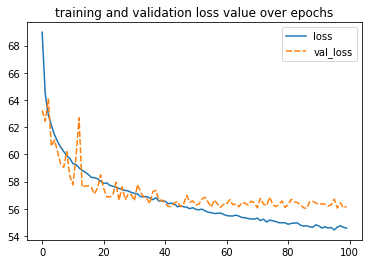

In [68]:
ax = sns.lineplot(data={k: v for k, v in history.history.items() if 'loss' in k})
ax.set_title('training and validation loss value over epochs')

### Visualization - 2

We can plot the "R Square" of the train and validation over epochs and see it improving over time

Text(0.5, 1.0, 'training and validation R square value over epochs')

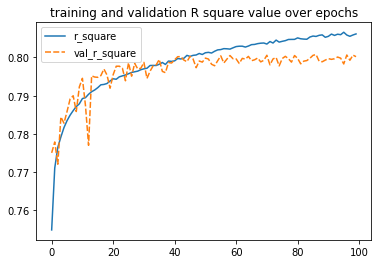

In [69]:
ax = sns.lineplot(data={k: v for k, v in history.history.items() if 'r_square' in k})
ax.set_title('training and validation R square value over epochs')

### Visualization - 3

Comparing the R Square values of all the Machine Learning models and deep learning model

In [70]:
all_models_score = {
    "Linear Regression": lr_score,
    "KNN": knn_score,
    "Decision Tree": dtree_score,
    "Light GBM": lgbm_score,
    "Deep Learning": dl_score
}

In [71]:
all_models_score

{'Linear Regression': 0.7501338712601957,
 'KNN': 0.7529259876664158,
 'Decision Tree': 0.76682508297535,
 'Light GBM': 0.7993354619891871,
 'Deep Learning': 0.8002363443374634}

Text(0.5, 1.0, 'R square for various ML models')

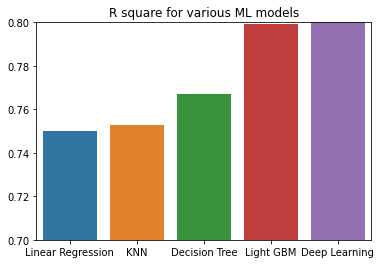

In [72]:
ax = sns.barplot(x=list(all_models_score.keys()), y=list(all_models_score.values()))
ax.set_ybound(0.7, 0.8)
ax.set_title('R square for various ML models')

Top 2 performing models are Light GBM and Deep Learning model. These will be used in the Phase 3 for building data product.

### Visualization - 4

Comparing the loss values of all the Machine Learning models and deep learning model

In [73]:
all_models_loss = {
    "Linear Regression": lr_loss,
    "KNN": knn_loss,
    "Decision Tree": dtree_loss,
    "Light GBM": lgbm_loss,
    "Deep Learning": dl_loss
}

In [74]:
all_models_loss

{'Linear Regression': 70.14919789318425,
 'KNN': 69.36531923260473,
 'Decision Tree': 65.46318815033239,
 'Light GBM': 56.33599262957038,
 'Deep Learning': 56.082984924316406}

Text(0.5, 1.0, 'Loss for various ML models')

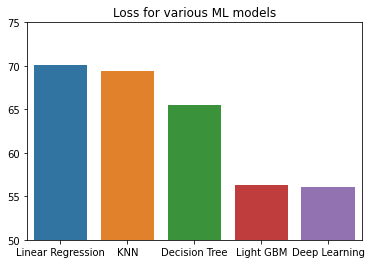

In [75]:
ax = sns.barplot(x=list(all_models_loss.keys()), y=list(all_models_loss.values()))
ax.set_ybound(50, 75)
ax.set_title('Loss for various ML models')

Again here too, Light GBM and Deep Learning models have least losses

## Conclusion
- In this notebook, Machine Learning algorithms are applied to predict the pricing
- Light GBM Regression gave best results among the various Machine Learning algorithms
- Seven deep learning models are applied to the problem resulting in even better results.
- Only one best performing deep learning model is shown in this notebook among all the ones that are tried.
- We will be using the LightGBM Regression model and the Deep Learning model for inference in Phase 3
- We can potentially extend this model by adding historical trip data from different months. But this is not the scope of this project.

## References
- https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
- https://registry.opendata.aws/nyc-tlc-trip-records-pds/
- Seaborn, Pandas, Numpy documentation
- https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
- https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
- http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-9.html
- https://hagan.okstate.edu/NNDesign.pdf#page=469
- https://datamahadev.com/understanding-light-gradient-boosting-machine/
- https://neptune.ai/blog/lightgbm-parameters-guide
- LightGBM is inspired from the Kaggle competition - https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/code